Scalable Databases Mid-Term Project : Online Book Recommendation Dataset

In [ ]:
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Book_data.csv")
df.head(5)

,bookID,title,genre,Age (up & above),ISBN
0,1,Hunger games,Young Adult,11,9780545229937
1,2,The Dark Prophecy,Young Adult,9,9788711907719
2,3,To Kill a Mockingbird,Young Adult,12,9780060888695
3,4,Six of Crows,Fantasy,13,9783426443798
4,5,Eragon,Fantasy,13,9781400090686


In [ ]:
df2 = pd.read_csv("/content/books_details.csv")
df2.head(5)

,bookID,title,genre,Age (up & above),authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,Price (in Dollars),publication_date,publisher
0,1,Hunger games,Young Adult,14,Suzanne Collins,4.30,Eng,374,7618865,188036,11.63,10/14/2008,Scholastic Press
1,2,The Dark Prophecy,Young Adult,14,Rick Riordan,4.19,Eng,414,88152,6161,8.99,04/02/2017,Disney-Hyperion
2,3,To Kill a Mockingbird,Young Adult,12,Harper Lee,4.27,Eng,336,5448897,106217,10.99,05/23/2006,Harper Perennial Modern Classics
3,4,Six of Crows,Fantasy,15,Leigh Bardugo,4.49,Eng,465,713673,79049,11.64,09/29/2015,Henry Holt & Company
4,5,Eragon,Fantasy,18,Christopher Paolini,3.93,Eng,503,1628072,24862,8.34,08/26/2002,Paolini LLC


In [ ]:
import sqlite3
conn = sqlite3.connect('Book_keeping.db')

In [ ]:
df2.to_sql('book_data', con=conn)
cursor = conn.execute(''' SELECT *
                          from book_data; ''')
for row in cursor:
    print(row)

(0, 1, 'Hunger games', 'Suzanne Collins', 4.3, 'Eng', 374, None, 188036, '10/14/2008', 'Scholastic Press', '2008', '10')
(1, 2, 'The Dark Prophecy', 'Rick Riordan', 4.19, 'Eng', 414, 88152, 6161, '04/02/2017', 'Disney-Hyperion', '2017', '04')
(2, 3, 'To Kill a Mockingbird', 'Harper Lee', 4.27, 'Eng', 336, 5448897, 106217, '05/23/2006', 'Harper Perennial Modern Classics', '2006', '05')
(3, 4, 'Six of Crows', 'Leigh Bardugo', 4.49, 'Eng', 465, 713673, 79049, '09/29/2015', 'Henry Holt & Company', '2015', '09')
(4, 5, 'Eragon', 'Christopher Paolini', 3.93, 'Eng', 503, 1628072, 24862, '08/26/2002', 'Paolini LLC', '2002', '08')
(5, 6, 'Legend', 'Marie Lu', 4.16, 'Eng', 256, 487822, 34140, '11/29/2011', 'Rocco Jovens Leitores', '2011', '11')
(6, 7, 'Sun is also a star', 'Nicola Yoon', 4.01, 'Eng', 384, 283269, 29424, '11/01/2016', 'Delacorte Press', '2016', '11')
(7, 8, 'The Silkworm', 'Robert Galbraith', 4.04, 'Eng', 464, 245321, 18268, '06/19/2014', 'Mulholland Books', '2014', '06')
(8, 9, 

In [ ]:
df.to_sql('book_details', con=conn)
cursor = conn.execute(''' SELECT *
                          from book_details; ''')
for row in cursor:
    print(row)

(0, 1, 'Hunger games', 'Young Adult', '11- 13', '9780545229937')
(2, 3, 'To Kill a Mockingbird', 'Young Adult ', '12-18', '9780060888695')
(3, 4, 'Six of Crows', 'Fantasy', '13 and above', '9783426443798')
(4, 5, 'Eragon', 'Fantasy', '13 and above', '9781400090686')
(5, 6, 'Legend', 'Young Adult', '13 and above', '8601419658442')
(6, 7, 'Sun is also a star', 'Teen Romance', '12 and above', '9788580416596')
(7, 8, 'The Silkworm', 'Crime Fiction', '15 and above', '9783641145958')
(8, 9, 'The Final Six', 'Science Fiction', '14 and above', '9781538498132')
(9, 10, 'Carve the Mark', 'Young Adult', '14 and above', '9788579803314')
(10, 11, 'Pet Sematary', 'Horror', '15 and above', '9780743518444')
(11, 12, 'The House Of Hades', 'Young Adult', '9 - 16', '9788711347089')
(12, 13, 'Vampire academy', 'Urban fantasy', '13 and above', '9783802588075')
(13, 14, 'The Golden Compass', 'Adventure', '9 - 14', '9780739337042')
(14, 15, 'Shadow and Bone', 'Fantasy', '9 - 16', '9783426453124')
(16, 17, 'L

In [ ]:
cursor = conn.execute(''' SELECT *
                          from book_data
                          where year between 2008 and 2018; ''')
for row in cursor:
    print(row)

(0, 1, 'Hunger games', 'Suzanne Collins', 4.3, 'Eng', 374, None, 188036, '10/14/2008', 'Scholastic Press', '2008', '10')
(1, 2, 'The Dark Prophecy', 'Rick Riordan', 4.19, 'Eng', 414, 88152, 6161, '04/02/2017', 'Disney-Hyperion', '2017', '04')
(3, 4, 'Six of Crows', 'Leigh Bardugo', 4.49, 'Eng', 465, 713673, 79049, '09/29/2015', 'Henry Holt & Company', '2015', '09')
(5, 6, 'Legend', 'Marie Lu', 4.16, 'Eng', 256, 487822, 34140, '11/29/2011', 'Rocco Jovens Leitores', '2011', '11')
(6, 7, 'Sun is also a star', 'Nicola Yoon', 4.01, 'Eng', 384, 283269, 29424, '11/01/2016', 'Delacorte Press', '2016', '11')
(7, 8, 'The Silkworm', 'Robert Galbraith', 4.04, 'Eng', 464, 245321, 18268, '06/19/2014', 'Mulholland Books', '2014', '06')
(8, 9, 'The Final Six', 'Alexandra Monir', 3.84, 'Eng', 338, 5762, 1006, '03/06/2018', 'HarperTeen', '2018', '03')
(9, 10, 'Carve the Mark', 'Veronica Roth', 3.78, 'Eng', 468, 79608, 8467, '01/17/2017', 'Katherine Tegen Books', '2017', '01')
(10, 11, 'Pet Sematary', 'S

All the books published between the years 2008 and 2018

In [ ]:
cursor = conn.execute(''' SELECT *
                          from book_details
                          where genre = 'Young Adult'; ''')
for row in cursor:
    print(row)

(0, 1, 'Hunger games', 'Young Adult', '11- 13', '9780545229937')
(5, 6, 'Legend', 'Young Adult', '13 and above', '8601419658442')
(9, 10, 'Carve the Mark', 'Young Adult', '14 and above', '9788579803314')
(11, 12, 'The House Of Hades', 'Young Adult', '9 - 16', '9788711347089')


All the books whose genre are "Young Adult"

In [ ]:
temp =''
title = df['title'].tolist()
dictarr = {}
for filename in os.listdir('/content/images/'):
    temp = filename
    for names in title:
        filename = filename.split("_")
        filename = " ".join(filename)
        filename = filename.replace(".jpg","")
        if(names.lower().__contains__(filename.lower())):
            img = Image.open('/content/images/'+temp)
            imgarr = np.asarray(img)
            dictarr[names]=imgarr

To convert images into numpy arrays and save them into a dictonary with title as the key.

This is then used to add images into the dataframe by mapping it based on titles

In [ ]:
df["ImageArray"] = df['title'].map(dictarr)
df.head()
df['genre'].value_counts()

Thriller                     8
Young Adult                  7
Fantasy                      7
Adventure                    5
Romance                      3
Horror                       3
Historical Fiction           3
Thiller                      2
Biography & Autobiography    1
Psychology                   1
Name: genre, dtype: int64

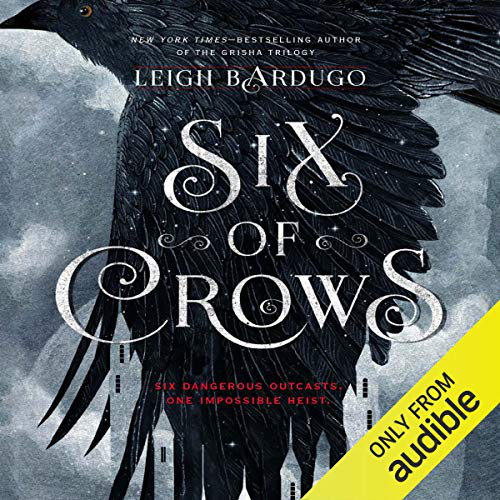

In [ ]:
img = Image.fromarray(df['ImageArray'][3])
img

Cross-checking the images are mapped correctly to the titles

In [ ]:
df.isnull().values.any()
df.isnull().sum()

bookID              0
title               0
genre               0
Age (up & above)    0
ISBN                0
ImageArray          9
dtype: int64

Checking for null values

In [ ]:
df[df.isnull().any(axis=1)]

,bookID,title,genre,Age (up & above),ISBN,ImageArray
1,2,The Dark Prophecy,Young Adult,9,9788711907719,NaN
11,12,The House Of Hades,Young Adult,9,9788711347089,NaN
15,16,City of Ashes,Adventure,13,9780743572750,NaN
17,18,The book thief,Historical Fiction,13,9780307433848,NaN
20,21,the three musketeers,Adventure,12,9780764137808,NaN
21,22,it starts with us,Romance,15,9781668001233,NaN
24,25,stranger in the woods,Biography & Autobiography,12,9781101911532,NaN
27,28,the art of war,Historical Fiction,16,9780140439199,NaN
35,36,A Perfect Neighborhood,Thriller,15,9781639100217,NaN


Viewing all the null values in the dataset

In [ ]:
df = df.dropna() # drop the NAN or empty value columns

In [ ]:
df.isnull().values.any()
df.isnull().sum()

bookID              0
title               0
genre               0
Age (up & above)    0
ISBN                0
ImageArray          0
dtype: int64

In [ ]:
df.head(5)

,bookID,title,genre,Age (up & above),ISBN,ImageArray
0,1,Hunger games,Young Adult,11,9780545229937,"[[[35, 31, 32], [35, 31, 32], [35, 31, 32], [3..."
2,3,To Kill a Mockingbird,Young Adult,12,9780060888695,"[[[168, 187, 142], [168, 186, 138], [168, 182,..."
3,4,Six of Crows,Fantasy,13,9783426443798,"[[[153, 171, 183], [158, 176, 188], [153, 171,..."
4,5,Eragon,Fantasy,13,9781400090686,"[[[0, 0, 156], [0, 0, 156], [0, 0, 156], [0, 0..."
5,6,Legend,Young Adult,13,8601419658442,"[[[176, 177, 181], [176, 177, 181], [177, 178,..."


Viewing the dataframe with the image array 

In [ ]:
boolean = df["title"].is_unique
boolean

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bookID            31 non-null     int64 
 1   title             31 non-null     object
 2   genre             31 non-null     object
 3   Age (up & above)  31 non-null     int64 
 4   ISBN              31 non-null     object
 5   ImageArray        31 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.7+ KB


In [ ]:
df2.head(5)

,bookID,title,genre,Age (up & above),authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,Price (in Dollars),publication_date,publisher
0,1,Hunger games,Young Adult,14,Suzanne Collins,4.30,Eng,374,7618865,188036,11.63,10/14/2008,Scholastic Press
1,2,The Dark Prophecy,Young Adult,14,Rick Riordan,4.19,Eng,414,88152,6161,8.99,04/02/2017,Disney-Hyperion
2,3,To Kill a Mockingbird,Young Adult,12,Harper Lee,4.27,Eng,336,5448897,106217,10.99,05/23/2006,Harper Perennial Modern Classics
3,4,Six of Crows,Fantasy,15,Leigh Bardugo,4.49,Eng,465,713673,79049,11.64,09/29/2015,Henry Holt & Company
4,5,Eragon,Fantasy,18,Christopher Paolini,3.93,Eng,503,1628072,24862,8.34,08/26/2002,Paolini LLC


In [ ]:
df2.isnull().values.any()
df2.isnull().sum()

bookID                0
title                 0
genre                 0
Age (up & above)      0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
Price (in Dollars)    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              40 non-null     int64  
 1   title               40 non-null     object 
 2   genre               40 non-null     object 
 3   Age (up & above)    40 non-null     int64  
 4   authors             40 non-null     object 
 5   average_rating      40 non-null     float64
 6   language_code       40 non-null     object 
 7   num_pages           40 non-null     int64  
 8   ratings_count       40 non-null     int64  
 9   text_reviews_count  40 non-null     int64  
 10  Price (in Dollars)  40 non-null     float64
 11  publication_date    40 non-null     object 
 12  publisher           40 non-null     object 
dtypes: float64(2), int64(5), object(6)
memory usage: 4.2+ KB


In [ ]:
df2['authors']

0                          Suzanne Collins
1                             Rick Riordan
2                               Harper Lee
3                            Leigh Bardugo
4                      Christopher Paolini
5                                 Marie Lu
6                              Nicola Yoon
7                         Robert Galbraith
8                          Alexandra Monir
9                            Veronica Roth
10                            Stephen King
11                            Rick Riordan
12                           Richelle Mead
13                          Philip Pullman
14                           Leigh Bardugo
15                         Cassandra Clare
16                         William Golding
17                            Markus Zusak
18                           Paula Hawkins
19                            Stephen King
20                         Alexandre Dumas
21                        Colleen Hoover\n
22                          Colleen Hoover
23         

In [ ]:
df2['ratings_count']

0     7618865
1       88152
2     5448897
3      713673
4     1628072
5      487822
6      283269
7      245321
8        5762
9       79608
10     516159
11     347374
12     614720
13    1431495
14     780911
15     866088
16    2638168
17    2256053
18     347987
19     233099
20     188100
21       1474
22       1929
23      18602
24       3702
25        265
26         51
27        920
28    1631221
29       9013
30      16666
31      11451
32     111091
33      10752
34        251
35      14923
36      26922
37       1156
38    1755253
39      20529
Name: ratings_count, dtype: int64

In [ ]:
df2['ratings_count'] = pd.to_numeric(df2['ratings_count'], errors='coerce').astype('Int64')

In [ ]:
df2.describe()

,bookID,Age (up & above),average_rating,num_pages,ratings_count,text_reviews_count,Price (in Dollars)
count,40.000000,40.000000,40.000000,40.000000,4.000000e+01,40.000000,40.000000
mean,20.500000,17.075000,4.217250,415.075000,7.613942e+05,25308.950000,8.265500
std,11.690452,3.576185,0.331809,135.665196,1.521574e+06,40191.568953,2.056842
min,1.000000,9.000000,3.590000,168.000000,5.100000e+01,7.000000,5.670000
25%,10.750000,15.000000,4.000000,326.250000,1.031725e+04,260.750000,6.780000
50%,20.500000,17.500000,4.175000,394.000000,1.495955e+05,7539.500000,7.445000
75%,30.250000,19.000000,4.500000,500.750000,7.304825e+05,27821.250000,9.207500
max,40.000000,24.000000,4.900000,736.000000,7.618865e+06,188036.000000,14.280000


In [ ]:
corr = df2.corr()
corr

,bookID,Age (up & above),average_rating,num_pages,ratings_count,text_reviews_count,Price (in Dollars)
bookID,1.000000,0.422881,0.346805,-0.003209,-0.422864,-0.506510,-0.234545
Age (up & above),0.422881,1.000000,0.283035,0.061611,-0.366626,-0.386746,0.098419
average_rating,0.346805,0.283035,1.000000,0.083168,0.017429,0.013334,0.263744
num_pages,-0.003209,0.061611,0.083168,1.000000,-0.117011,-0.019286,0.209319
ratings_count,-0.422864,-0.366626,0.017429,-0.117011,1.000000,0.878043,0.318255
text_reviews_count,-0.506510,-0.386746,0.013334,-0.019286,0.878043,1.000000,0.285632
Price (in Dollars),-0.234545,0.098419,0.263744,0.209319,0.318255,0.285632,1.000000


In [ ]:
df2['publisher'].value_counts()

Scribner                                   3
Henry Holt & Company                       2
Atria Books                                2
Scholastic Press                           1
Bantam Books                               1
Higher Bank Books                          1
Knopf Doubleday Publishing Group           1
The Last Bureau                            1
Boldwood Books                             1
Harper Press                               1
Knopf Doubleday Publishing                 1
Penguin Random House                       1
Bantam                                     1
Cassell and Company                        1
Crooked Lane Books                         1
G. P. Putnam's Sons                        1
Allen & Unwin                              1
Scholastic                                 1
Grand Central Publishing                   1
Simon & Schuster                           1
Disney-Hyperion                            1
Riverhead Books                            1
Alfred A. 

In [ ]:
df2['average_rating'].describe()

count    40.000000
mean      4.217250
std       0.331809
min       3.590000
25%       4.000000
50%       4.175000
75%       4.500000
max       4.900000
Name: average_rating, dtype: float64

In [ ]:
df2['ratings_count'].describe()

count    4.000000e+01
mean     7.613942e+05
std      1.521574e+06
min      5.100000e+01
25%      1.031725e+04
50%      1.495955e+05
75%      7.304825e+05
max      7.618865e+06
Name: ratings_count, dtype: float64

Rating Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


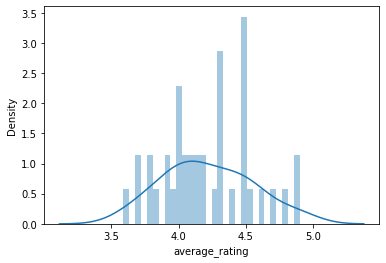

In [ ]:
sns.distplot(df2['average_rating'], bins=30)

majority of ratings are in the range of 3.9-4.3

Distribution plot for number of pages(books)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


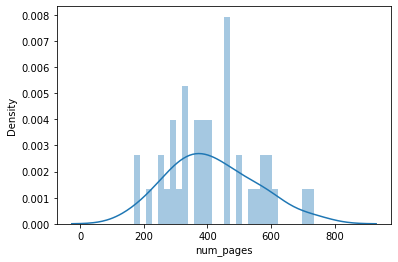

In [ ]:
sns.distplot(df2['num_pages'],bins = 30)

majority of number of pages count in under 600
highesy number of pages is near 700

In [ ]:
df.columns

Index(['bookID', 'title', 'genre', 'Age (up & above)', 'ISBN', 'ImageArray'], dtype='object')

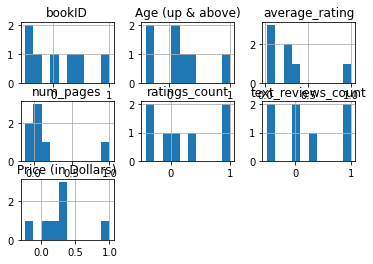

In [ ]:
hisogram = corr.hist()

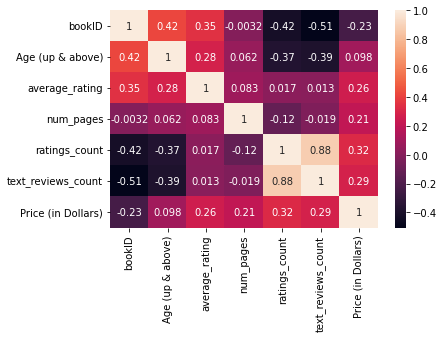

In [ ]:
sns.heatmap(corr, annot = True)

Top 15 Book Publisher

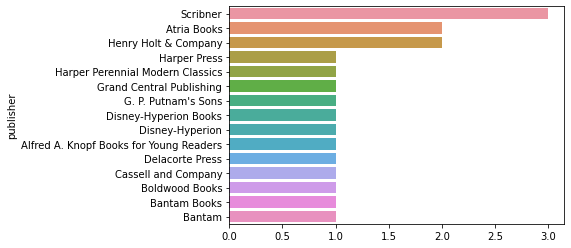

In [ ]:
# Top 20 Publisher
publisher = df2.value_counts('publisher').sort_values(ascending=False).head(15)
sns.barplot(y=publisher.index,x = publisher)

occurance of books 

Text(0, 0.5, 'Books')

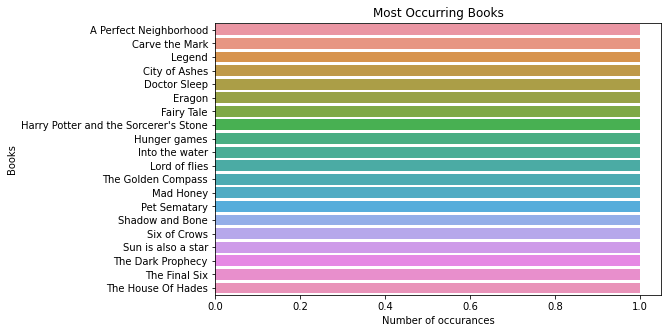

In [ ]:
plt.figure(figsize = (8,5))
title = df2.value_counts('title').sort_values(ascending=False).head(20)
sns.barplot(y=title.index,x=title)
plt.title('Most Occurring Books')
plt.xlabel("Number of occurances")
plt.ylabel('Books')

occurence of authors

Text(0, 0.5, 'authors')

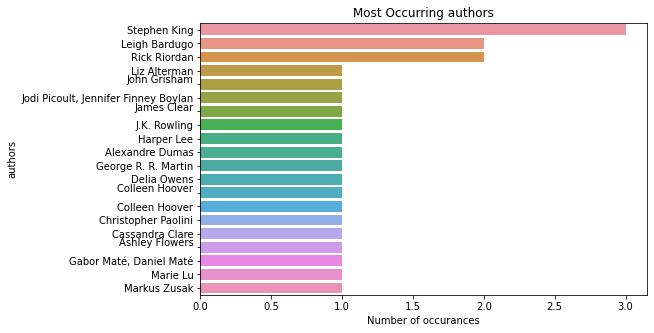

In [ ]:
plt.figure(figsize = (8,5))
title = df2.value_counts('authors').sort_values(ascending=False).head(20)
sns.barplot(y=title.index,x=title)
plt.title('Most Occurring authors')
plt.xlabel("Number of occurances")
plt.ylabel('authors')

Top 10 highest page count book

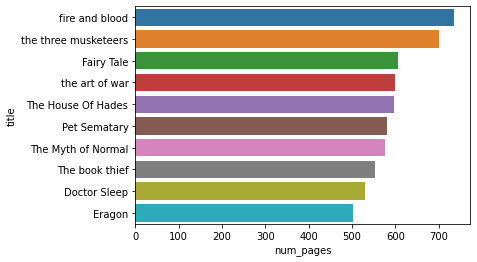

In [ ]:
x = df2.loc[:,['title', 'num_pages']].sort_values(by=['num_pages'],ascending = False).head(10)
sns.barplot(y = 'title',x='num_pages',data = x)

we can see that the highest count is 700 pages for fire and blood book followed by the three musketeers

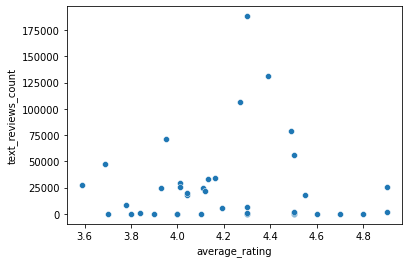

In [ ]:
sns.scatterplot(y='text_reviews_count',x='average_rating',data=df2)

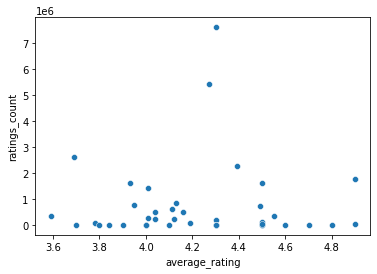

In [ ]:
sns.scatterplot(y='ratings_count',x='average_rating',data=df2)

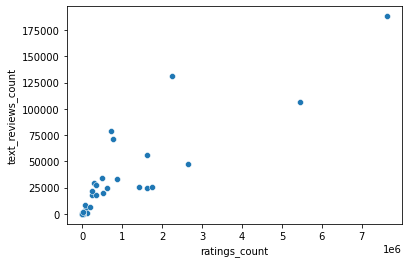

In [ ]:
sns.scatterplot(x='ratings_count',y='text_reviews_count',data=df2)

can see some relation between rating count and text review count

Plot between Price and Rating count:

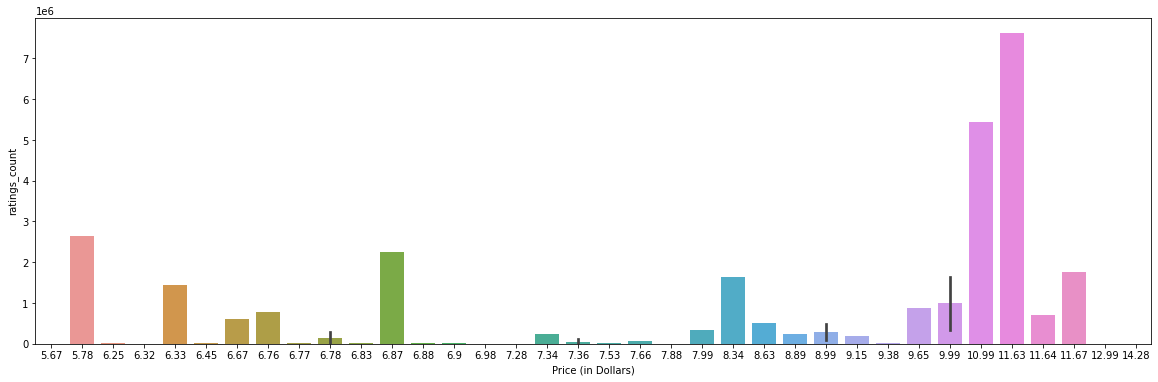

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(x='Price (in Dollars)',y='ratings_count',data=df2)

How number of pages affects the price of the book:

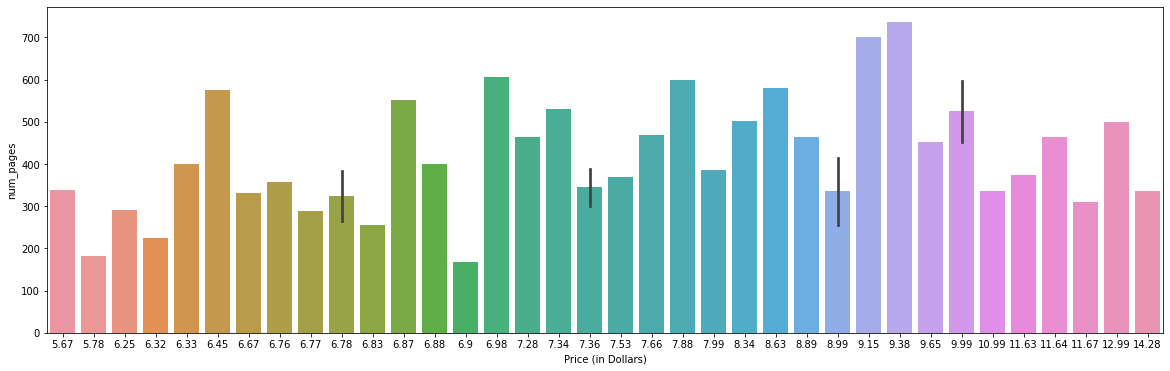

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(x='Price (in Dollars)',y='num_pages',data=df2)

Genre vs Price:

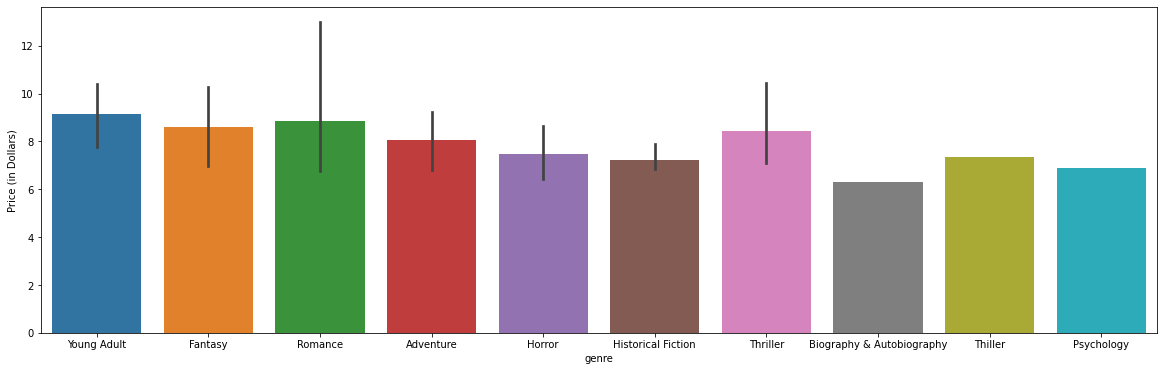

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(y='Price (in Dollars)',x='genre',data=df2)

Price range based on the type of Genre being picked up 

Genre VS Age:

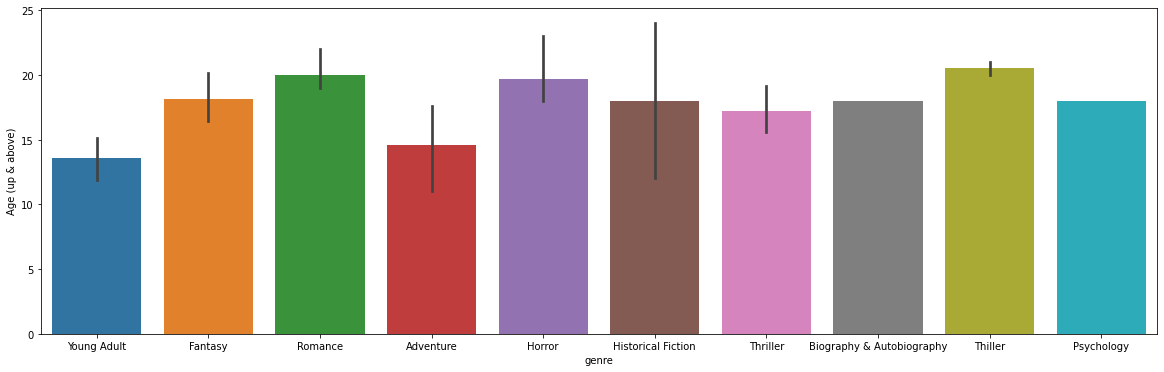

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(x='genre',y='Age (up & above)',data=df2)

Price of book based on author:

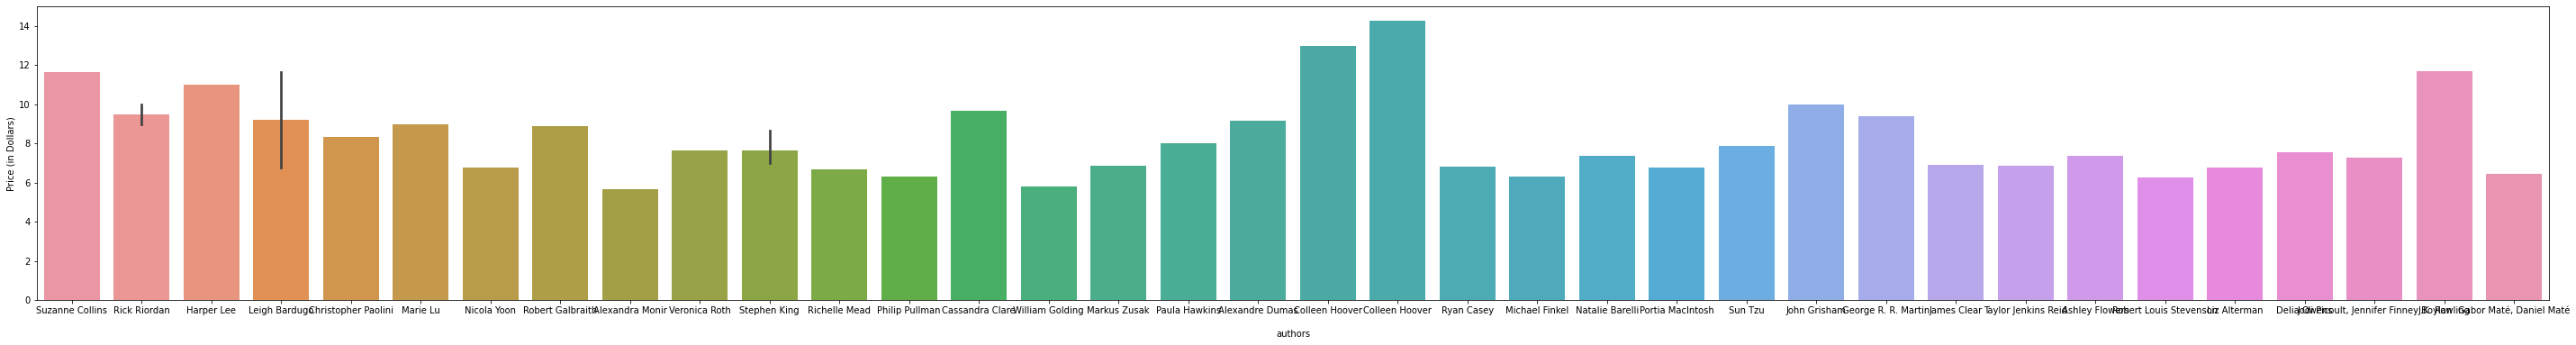

In [ ]:
plt.figure(figsize = (50,6))
sns.barplot(y='Price (in Dollars)',x='authors',data=df2)

Price of book based on publishing house

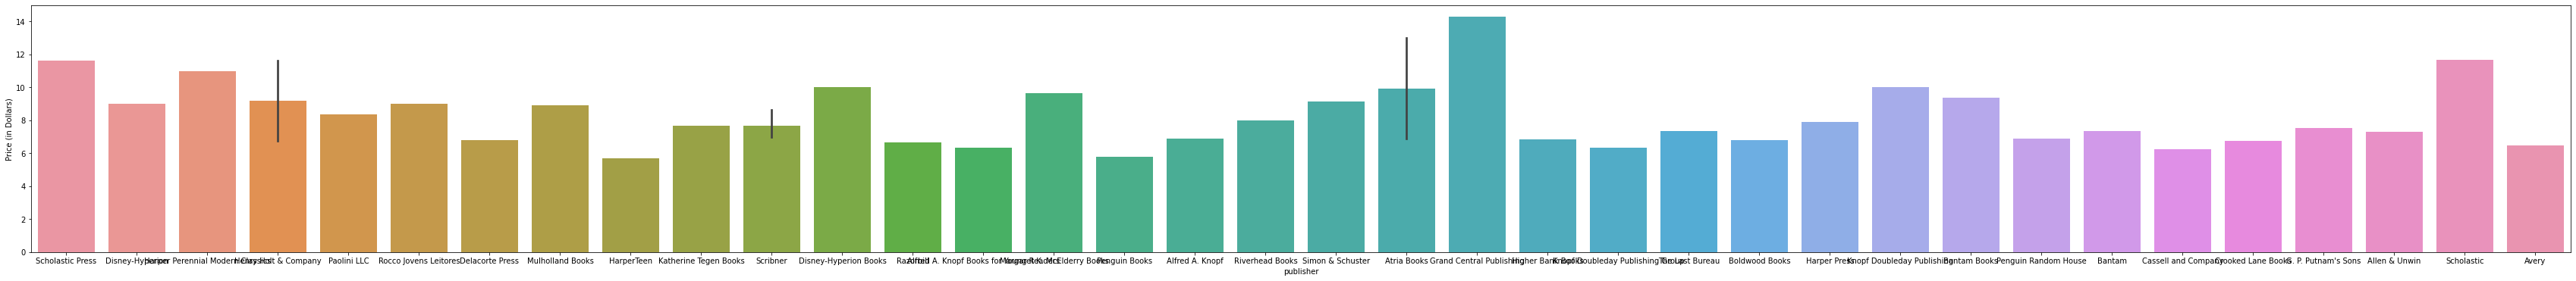

In [ ]:
plt.figure(figsize = (60,6))
sns.barplot(y='Price (in Dollars)',x='publisher',data=df2)

Bubble plot to show the correlation between author and genre

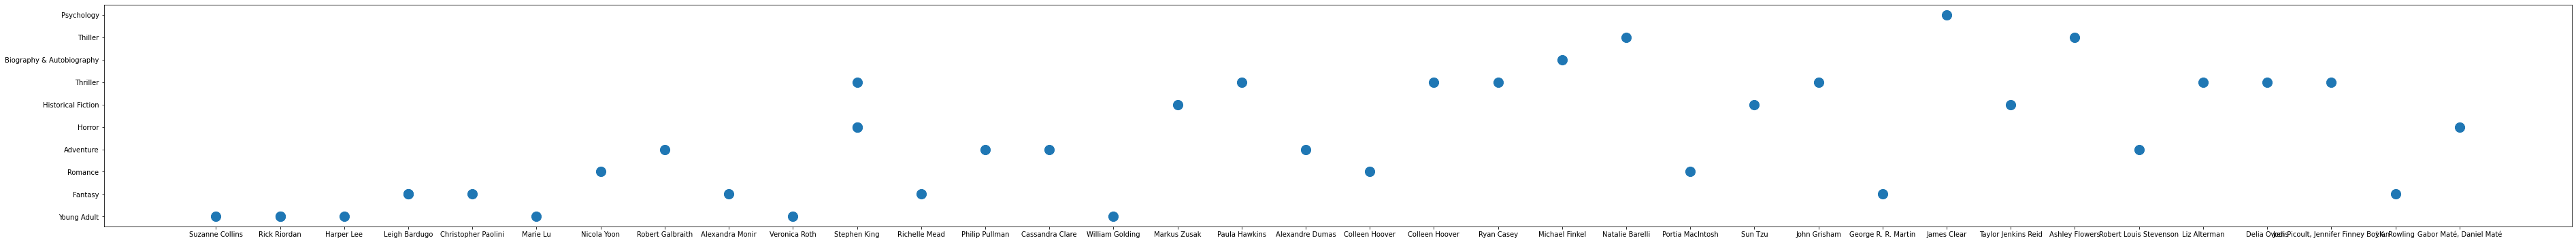

In [ ]:
plt.figure(figsize = (65,6))
plt.scatter(y='genre',x='authors', s = 200 ,data=df2)

TOP 10 Books

In [ ]:
df2.sort_values('average_rating',ascending = False).head(10)

In [ ]:
mean = df2['average_rating'].mean()
print("The mean or average rating for the dataset is : {0}\n".format(mean))
for index, row in df2.iterrows():
  if row['average_rating'] > mean:
    print("The title : {0}  - rating: {1} ".format(row['title'].strip(),row['average_rating']))

Gives a list of all the books whose ratings are above the average book rating across the entire dataset.

This would give us a list of good books.

In which year, highest books published.?

In [ ]:
months=[]
days=[]
year=[]
for i in df2['publication_date']:
    year.append(i.split('/')[2])
    months.append(i.split('/')[0])

df2['year'] = year
df2['month'] = months

In [ ]:
plt.figure(figsize = (10,5))
year = df2['year'].value_counts().head(10)
year
sns.barplot(y=year.index,x=year)

in the year 2022 majority of books were published

In [ ]:
plt.figure(figsize = (10,5))
month = df2['month'].value_counts().head(10)

sns.barplot(y=month.index,x=month)

in october month majority of books were published

*Top* Authors

In [ ]:
x = df2.groupby('authors')['title'].count().reset_index().sort_values('title',ascending = False)
x.head(3)